# Data Cleaning and EDA
---

## Problem statement: 
We are looking into breaking into the world of freelance data journalism and are reaching out to Nate Silver and co. at FiveThirtyEight so they can hear our pitch on how to create a Reddit post that will get the most engagement. We want to find out what characteristics of a post on Reddit will be the most predictive of the overall interaction on a post as measured by number of comments (above/below the median). With this we hope to provide a classification model to FiveThirtyEight that is satisfactory and jumpstart our career!

## Let's add all the necessary imports
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

## Now let's load in our csv files and merge it all together into one large data frame.
---

In [2]:
reddit_1 = pd.read_csv('../data/reddit_1.csv')
reddit_2 = pd.read_csv('../data/reddit_2.csv')
reddit_3 = pd.read_csv('../data/reddit_3.csv')
reddit_4 = pd.read_csv('../data/reddit_4.csv')
reddit_5 = pd.read_csv('../data/reddit_5.csv')

### Let's check the dfs to make sure everything looks good

In [3]:
reddit_1.head(1)

,id,subreddit,title,post_body,number of comments,time_posted,time_now,time_difference
0,uzz4yd,facepalm,Show me,NaN,1413,2022-05-28 23:47:41.000000,2022-05-29 03:17:37.780016,0 days 03:29:56.780016


In [4]:
reddit_2.head(1)

,id,subreddit,title,post_body,number of comments,time_posted,time_now,time_difference
0,v0fqsb,todayilearned,TIL that in the 1630s there was a song only pl...,NaN,218,2022-05-29 17:14:29.000000,2022-05-29 20:49:55.081123,0 days 03:35:26.081123


### Fix the `number of comments` naming convention for reddit 1 & 2

In [5]:
reddit_1.columns = [col.replace(' ', '_') if col == 'number of comments' else col for col in reddit_1.columns]
reddit_1.columns

Index(['id', 'subreddit', 'title', 'post_body', 'number_of_comments',
       'time_posted', 'time_now', 'time_difference'],
      dtype='object')

In [6]:
reddit_2.columns = [col.replace(' ', '_') if col == 'number of comments' else col for col in reddit_2.columns]
reddit_2.columns

Index(['id', 'subreddit', 'title', 'post_body', 'number_of_comments',
       'time_posted', 'time_now', 'time_difference'],
      dtype='object')

In [7]:
reddit_3.head(1)

,id,subreddit,title,post_body,number_of_comments,time_posted,time_now,time_difference
0,v0zded,news,A 9-year-old describes escaping through a wind...,NaN,1461,2022-05-30 12:42:48.000000,2022-05-30 16:44:58.527382,0 days 04:02:10.527382


In [8]:
reddit_4.head(1)

,id,subreddit,title,post_body,number_of_comments,time_posted,time_now,time_difference
0,v1oqwn,clevercomebacks,"""It's actually like that everywhere""",NaN,435,2022-05-31 12:06:23.000000,2022-05-31 15:59:14.788832,0 days 03:52:51.788832


In [9]:
reddit_5.head(1)

,id,subreddit,title,post_body,number_of_comments,time_posted,time_now,time_difference
0,v2h1i4,BlackPeopleTwitter,“U.S. median rent to reach record high of $200...,NaN,683,2022-06-01 13:28:58.000000,2022-06-01 16:07:00.285441,0 days 02:38:02.285441


In [10]:
df = pd.concat([reddit_1, reddit_2, reddit_3, reddit_4, reddit_5], ignore_index=True)
df.head()

,id,subreddit,title,post_body,number_of_comments,time_posted,time_now,time_difference
0,uzz4yd,facepalm,Show me,NaN,1413,2022-05-28 23:47:41.000000,2022-05-29 03:17:37.780016,0 days 03:29:56.780016
1,uzysdi,WhitePeopleTwitter,Her name was Michelle Snow and she was almost 8,NaN,577,2022-05-28 23:27:57.000000,2022-05-29 03:17:37.780016,0 days 03:49:40.780016
2,uzz6t5,movies,"Dear god, no, Morbius 2 has not been greenlit",NaN,1001,2022-05-28 23:50:22.000000,2022-05-29 03:17:37.780016,0 days 03:27:15.780016
3,uzwk33,funny,So Costco apparently doesn't re-take membershi...,NaN,792,2022-05-28 21:28:11.000000,2022-05-29 03:17:37.780016,0 days 05:49:26.780016
4,uzzxuf,oddlysatisfying,How to draw balls,NaN,416,2022-05-29 00:33:47.000000,2022-05-29 03:17:37.780016,0 days 02:43:50.780016


In [11]:
df.shape

(20000, 8)

## Now we are going to remove columns that we do not need and keep at least the 4 columns mentioned in the Project Overview: 
## Title, Subreddit, Length of time its been up, Number of comments
---

In [12]:
df.drop(columns=['time_posted', 'time_now'], inplace=True)

In [13]:
df.head()

,id,subreddit,title,post_body,number_of_comments,time_difference
0,uzz4yd,facepalm,Show me,NaN,1413,0 days 03:29:56.780016
1,uzysdi,WhitePeopleTwitter,Her name was Michelle Snow and she was almost 8,NaN,577,0 days 03:49:40.780016
2,uzz6t5,movies,"Dear god, no, Morbius 2 has not been greenlit",NaN,1001,0 days 03:27:15.780016
3,uzwk33,funny,So Costco apparently doesn't re-take membershi...,NaN,792,0 days 05:49:26.780016
4,uzzxuf,oddlysatisfying,How to draw balls,NaN,416,0 days 02:43:50.780016


### Now let's take a look and see what null values are present, if any.

In [14]:
df.isnull().sum()

id                        0
subreddit                 0
title                     0
post_body             19104
number_of_comments        0
time_difference           0
dtype: int64

In [15]:
19104 / 20000

0.9552

### The column `post_body` has 95.52% of its values missing. Since each post_body is unique there is no optimal way to impute for the null values. That combined with how many values are missing, it is better to just drop the column. 

In [16]:
df.drop(columns=['post_body'], inplace=True)
df.head()

,id,subreddit,title,number_of_comments,time_difference
0,uzz4yd,facepalm,Show me,1413,0 days 03:29:56.780016
1,uzysdi,WhitePeopleTwitter,Her name was Michelle Snow and she was almost 8,577,0 days 03:49:40.780016
2,uzz6t5,movies,"Dear god, no, Morbius 2 has not been greenlit",1001,0 days 03:27:15.780016
3,uzwk33,funny,So Costco apparently doesn't re-take membershi...,792,0 days 05:49:26.780016
4,uzzxuf,oddlysatisfying,How to draw balls,416,0 days 02:43:50.780016


## Now that we have removed all null values let's take a look at each column and perform some EDA and any additional data cleaning as needed.
---

In [17]:
def perform_eda(col):
    print(f'Number of unique values: {col.nunique()}')
    return(col.describe())

### Let's take a look at `id` first
---

In [18]:
perform_eda(df['id'])

Number of unique values: 19642


count      20000
unique     19642
top       v0047w
freq           3
Name: id, dtype: object

### Looks like we have some repeat values, if the `id` repeats that means we have duplicate posts in our dataframe. Let's go ahead and drop those duplicates.

In [19]:
df.drop_duplicates('id', ignore_index=True, inplace=True)
perform_eda(df['id'])

Number of unique values: 19642


count      19642
unique     19642
top       uzz4yd
freq           1
Name: id, dtype: object

### Now that we have confirmed that there are no duplicates using the `id` column let's drop this column as it serves no other purpose for our dataframe and does not make sense to include it as it is a randomly generated value per post.

In [20]:
df.drop(columns=['id'], inplace=True)
df.head()

,subreddit,title,number_of_comments,time_difference
0,facepalm,Show me,1413,0 days 03:29:56.780016
1,WhitePeopleTwitter,Her name was Michelle Snow and she was almost 8,577,0 days 03:49:40.780016
2,movies,"Dear god, no, Morbius 2 has not been greenlit",1001,0 days 03:27:15.780016
3,funny,So Costco apparently doesn't re-take membershi...,792,0 days 05:49:26.780016
4,oddlysatisfying,How to draw balls,416,0 days 02:43:50.780016


### Now let's take a look at the `title` column.
---

In [21]:
perform_eda(df['title'])

Number of unique values: 18845


count     19642
unique    18845
top        hmmm
freq         24
Name: title, dtype: object

### Looks like we have duplicate titles as the unique values don't equal the count. Let's remove all the duplicate values now.

In [22]:
df.drop_duplicates('title', ignore_index=True, inplace=True)
perform_eda(df['title'])

Number of unique values: 18845


count       18845
unique      18845
top       Show me
freq            1
Name: title, dtype: object

### Now let's take a look at the `subreddit` column.
---

In [23]:
perform_eda(df['subreddit'])

Number of unique values: 3810


count     18845
unique     3810
top       memes
freq         34
Name: subreddit, dtype: object

### Crucial to note that a total of 3810 unique subbreddits ended up as 'hot' in Reddit.

### We will now create a bar plot of the value counts of the top 10 subreddits

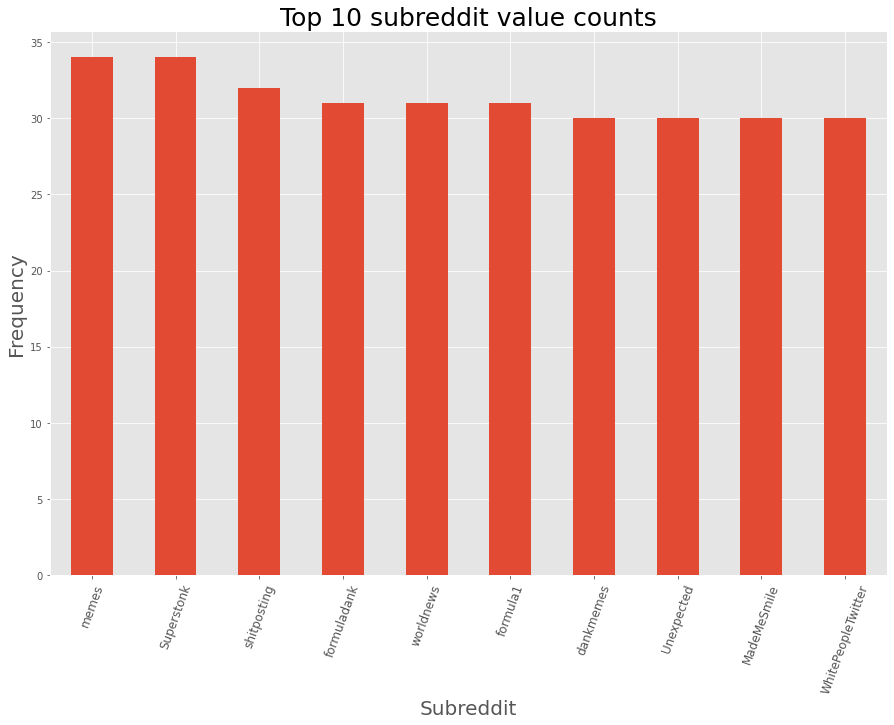

In [24]:
df['subreddit'].value_counts()[:10].plot(kind='bar', figsize=(15,10))
plt.title('Top 10 subreddit value counts', fontsize=25)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Subreddit', fontsize=20)
plt.xticks(rotation=70, fontsize=12);

In [25]:
df['subreddit'].value_counts()[:10]

memes                 34
Superstonk            34
shitposting           32
formuladank           31
worldnews             31
formula1              31
dankmemes             30
Unexpected            30
MadeMeSmile           30
WhitePeopleTwitter    30
Name: subreddit, dtype: int64

### We can see that the most occurring subreddit that shows up as 'hot' is the memes subreddit closely followed by shitposting, Superstonk, and formuladank. The top 10 subbreddits all have shown up on 'hot' more than 30 times in our data frame.

In [26]:
df['subreddit'].value_counts()[-2:]

dogswearinghats    1
Habs               1
Name: subreddit, dtype: int64

### We can see that the bottom 2 least occurring subreddits have a value count of 1. Let's further investigate to see how many subreddits only showed up 1 time on the 'hot' section of Reddit.

In [27]:
# .duplicated(keep=False) will return True if duplicate and False if not, using the '~' we can 
# inverse to set the non duplactes as true to see what our count of non duplicates is
df[~df['subreddit'].duplicated(keep=False)]

,subreddit,title,number_of_comments,time_difference
202,anime_irl,anime_irl,93,0 days 11:11:28.347045
212,PerfectTiming,Funny picture of this dog (Insta Account of a ...,12,0 days 05:08:46.347045
215,KeanuBeingAwesome,"Laughs in 5'7""",37,0 days 11:11:47.347045
256,TheWeeklyRoll,"Ch. 117. ""Wack, Thunk, Ping""",91,0 days 10:47:23.347045
345,nevertellmetheodds,At Monaco GP - Red Bull hitting a pigeon in fr...,91,0 days 12:49:06.303176
...,...,...,...,...
18112,AskNYC,What are some great life hacks for living in NYC?,240,0 days 05:46:22.124134
18114,wildbeef,Dust watch,1,0 days 03:49:11.124134
18117,ImaginaryFallout,Fallout - A Post Nuclear Role Playing Game by ...,5,0 days 02:59:50.124134
18118,RunningCirclejerk,I'm ashamed of myself,21,0 days 03:07:27.124134


In [28]:
1165 / 3810

0.30577427821522307

### There are a total of 1165 subreddits that only appeared once in the 'hot' section of Reddit. This is also means that  30.57% of all the subbreddits that showed up on 'hot' only showed up once. While 69.43% of subreddits showed up 2 or more times.

### Now let's take a look at the distribution of average number of comments based on subreddit. Let's look at the top 20.

In [29]:
df_subreddit = df.groupby('subreddit').mean().sort_values('number_of_comments', ascending=False)

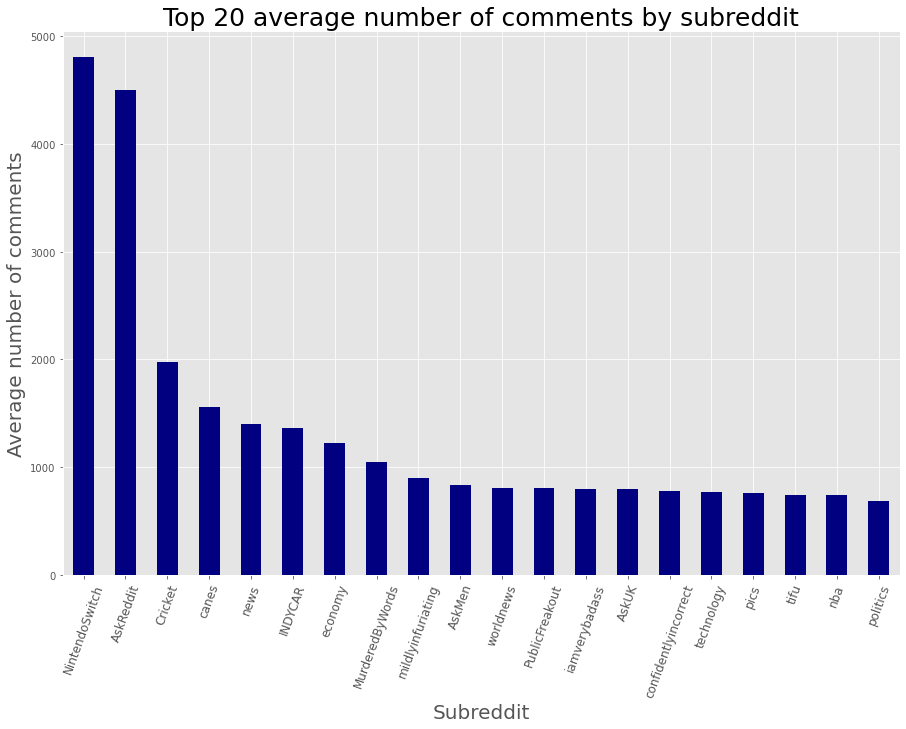

In [30]:
df_subreddit['number_of_comments'][:20].plot(kind='bar', figsize=(15,10), color='navy')
plt.title('Top 20 average number of comments by subreddit', fontsize=25)
plt.ylabel('Average number of comments', fontsize=20)
plt.xlabel('Subreddit', fontsize=20)
plt.xticks(rotation=70, fontsize=12);

In [31]:
df_subreddit['number_of_comments'][:20]

subreddit
NintendoSwitch          4805.500000
AskReddit               4502.058824
Cricket                 1977.777778
canes                   1559.500000
news                    1395.961538
INDYCAR                 1360.571429
economy                 1221.750000
MurderedByWords         1043.111111
mildlyinfuriating        894.571429
AskMen                   834.200000
worldnews                806.483871
PublicFreakout           802.818182
iamverybadass            801.200000
AskUK                    799.800000
confidentlyincorrect     775.187500
technology               766.809524
pics                     764.136364
tifu                     741.666667
nba                      737.636364
politics                 682.206897
Name: number_of_comments, dtype: float64

### From our graph we can see that Ninentdo Switch and AskReddit have by far the highest average number of comments. Followed by Cricket subreddit with over 2000 average number of comments less than AskReddit, really highlighting how high the average number of comments is for the top 2 subreddits.

### Now let's take a look at the `time_difference` column.
---

In [32]:
perform_eda(df['time_difference'])

Number of unique values: 18832


count                      18845
unique                     18832
top       0 days 08:23:11.695566
freq                           2
Name: time_difference, dtype: object

### Looks like our time_difference column is a string, let's change the time to a timedelta so we can pull specific attributes from it.

In [33]:
df['time_difference'] = pd.to_timedelta(df['time_difference'])

In [34]:
perform_eda(df['time_difference'])

Number of unique values: 18832


count                        18845
mean     0 days 08:06:43.282724591
std      0 days 04:34:06.634882196
min         0 days 00:16:17.613412
25%         0 days 04:32:51.743977
50%         0 days 07:06:37.613412
75%         0 days 11:02:36.076196
max         0 days 23:58:41.877501
Name: time_difference, dtype: object

### Let's use the seconds attribute of timedelta and convert the time_difference into minutes

In [35]:
df['time_difference'] = df['time_difference'].map(lambda x: round((x.seconds) / 60))

In [36]:
perform_eda(df['time_difference'])

Number of unique values: 1306


count    18845.000000
mean       486.712868
std        274.108546
min         16.000000
25%        273.000000
50%        427.000000
75%        663.000000
max       1439.000000
Name: time_difference, dtype: float64

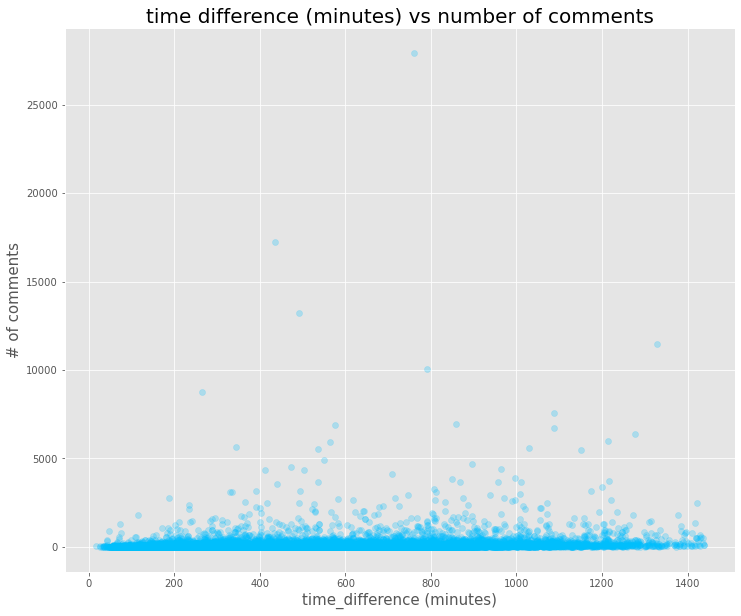

In [37]:
plt.figure(figsize=(12,10))
plt.scatter(df['time_difference'], df['number_of_comments'], alpha=.25, color='deepskyblue');
plt.xlabel('time_difference (minutes)', fontsize=15)
plt.ylabel('# of comments', fontsize=15)
plt.title('time difference (minutes) vs number of comments', fontsize=20);

In [38]:
df[df['number_of_comments'] < 2000].shape

(18768, 4)

In [39]:
df.shape

(18845, 4)

### From the plot above we can see that there is no apparent relationship between time_difference and number of comments. We can see that for number of comments that vast majority (99.59%) have 2000 number of comments or less. Let's remove all those outliers with number of comments greater than 2000 and plot the distribution to see what changes.

In [40]:
df_dropped_2000 = df.drop(df[df['number_of_comments'] > 2000].index)

In [41]:
perform_eda(df_dropped_2000['time_difference'])

Number of unique values: 1305


count    18768.000000
mean       485.616368
std        273.461407
min         16.000000
25%        272.000000
50%        425.500000
75%        660.000000
max       1439.000000
Name: time_difference, dtype: float64

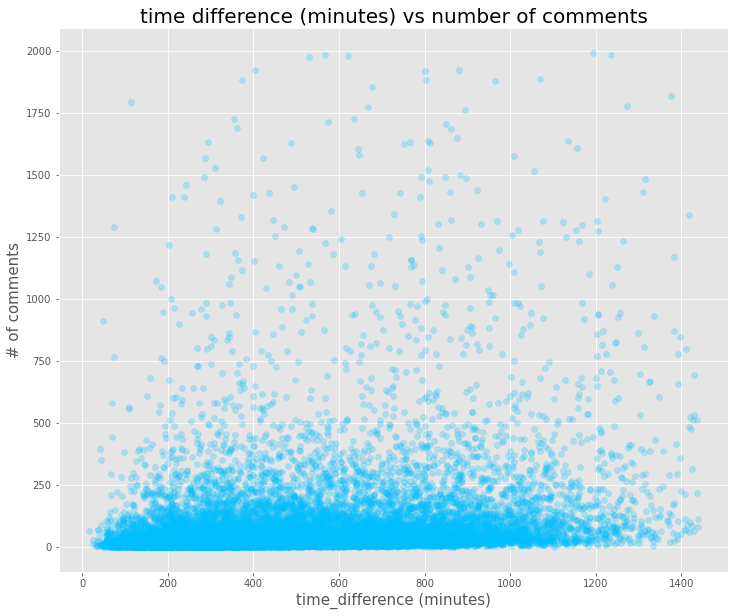

In [42]:
plt.figure(figsize=(12,10))
plt.scatter(df_dropped_2000['time_difference'], df_dropped_2000['number_of_comments'], alpha=.25, color='deepskyblue');
plt.xlabel('time_difference (minutes)', fontsize=15)
plt.ylabel('# of comments', fontsize=15)
plt.title('time difference (minutes) vs number of comments', fontsize=20);

### Keeping only posts with 2000 or less comments we start to see a different spread of data points in our plot. Still we don't see a true linear relationship and we can still see that a huge cluster of posts are below 500 comments. Let's remove posts with comments over 500 and see what the plot looks like.

In [43]:
df_dropped_500 = df.drop(df[df['number_of_comments'] > 500].index)

In [44]:
perform_eda(df_dropped_500['time_difference'])

Number of unique values: 1285


count    18316.000000
mean       479.532321
std        268.872517
min         16.000000
25%        270.000000
50%        421.000000
75%        650.000000
max       1439.000000
Name: time_difference, dtype: float64

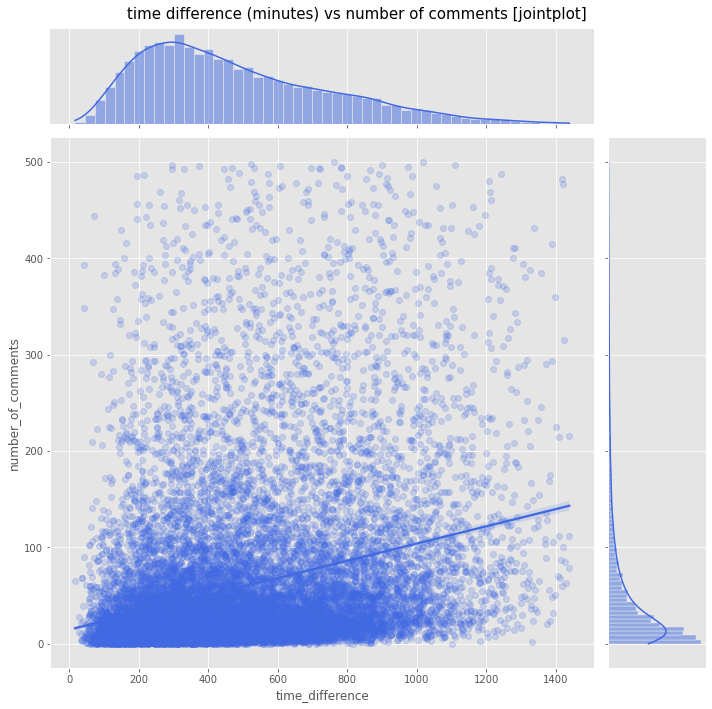

In [45]:
# modified alpha value from 
# https://stackoverflow.com/questions/54703781/how-to-pass-alpha-transparency-into-seaborn-jointplot
sns.jointplot(x=df_dropped_500['time_difference'], y=df_dropped_500['number_of_comments'], kind='reg', height=10,
              color='royalblue', joint_kws = {'scatter_kws':dict(alpha=0.2)})
plt.suptitle("time difference (minutes) vs number of comments [jointplot]", fontsize=15)
plt.tight_layout();

### From the jointplot above we can see that there is a better distribution of data points but still no clear linear relationship present.

### Now that we've finished taking a look at our feature columns let's take a look at our target column, `number_of_comments`
---

In [46]:
perform_eda(df['number_of_comments'])

Number of unique values: 921


count    18845.000000
mean        95.695145
std        399.157862
min          0.000000
25%         11.000000
50%         28.000000
75%         73.000000
max      27939.000000
Name: number_of_comments, dtype: float64

### The median number of comments is 

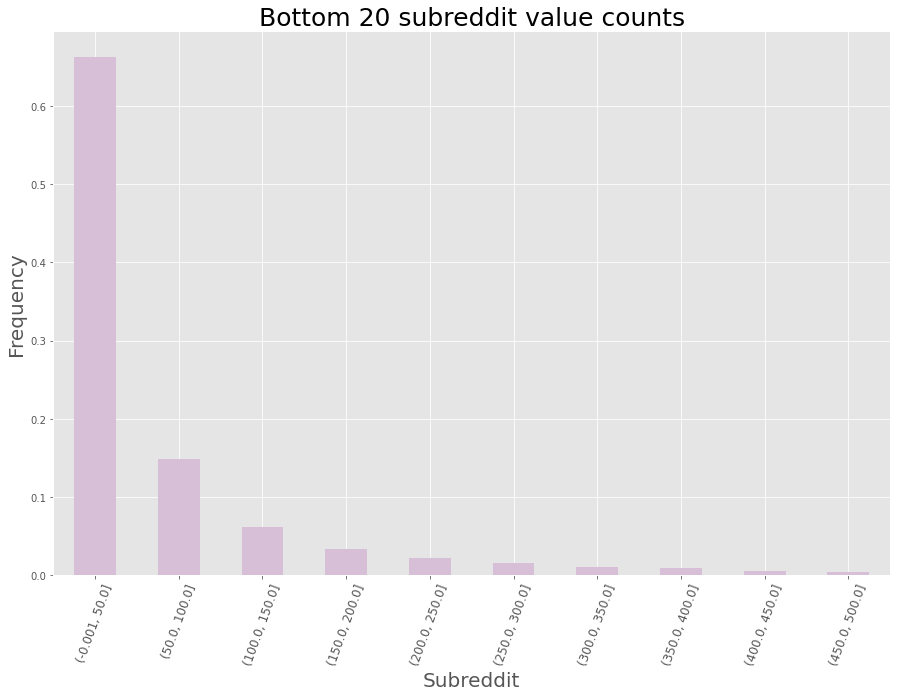

In [47]:
df['number_of_comments'].value_counts(bins=list(range(0,550,50)), normalize=True)\
.plot(kind='bar', figsize=(15,10), color='thistle')

plt.title('Bottom 20 subreddit value counts', fontsize=25)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Subreddit', fontsize=20)
plt.xticks(rotation=70, fontsize=12);

### We can see that the majority (60%+) of subbreddits have under 50 comments. This shows that we have some outliers in the number_of_comments column.

In [48]:
df.to_csv('../data/cleaned_df.csv', index=False)

In [49]:
df

,subreddit,title,number_of_comments,time_difference
0,facepalm,Show me,1413,210
1,WhitePeopleTwitter,Her name was Michelle Snow and she was almost 8,577,230
2,movies,"Dear god, no, Morbius 2 has not been greenlit",1001,207
3,funny,So Costco apparently doesn't re-take membershi...,792,349
4,oddlysatisfying,How to draw balls,416,164
...,...,...,...,...
18840,cats,sometimes I find Gus laying in the window like...,34,726
18841,SkyrimMemes,"Hadring got himself another customer, eh?",6,309
18842,pokemongo,Cubone are you okay?,29,478
18843,h3h3productions,us rn,38,794


## Based on our EDA we can see that some characteristics, subreddit and title, may help us predict overall interaction on a thread (measured by number of comments).